In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
x_scaled=pd.read_csv('D:\Projects\DATA_ANALYST_PROJECTS\Customer_Segmentation_&_Market_Basket_Analysis\data\Mall_Customers_processed.csv')


In [4]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
clusters=kmeans.fit_predict(x_scaled)

e:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
df=pd.read_csv('D:\Projects\DATA_ANALYST_PROJECTS\Customer_Segmentation_&_Market_Basket_Analysis\data\Mall_Customers.csv')
df['cluster']=clusters

In [ ]:
df.to_csv('D:\Projects\DATA_ANALYST_PROJECTS\Customer_Segmentation_&_Market_Basket_Analysis\data/Mall_Customers_Clustered.csv',index=False)

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


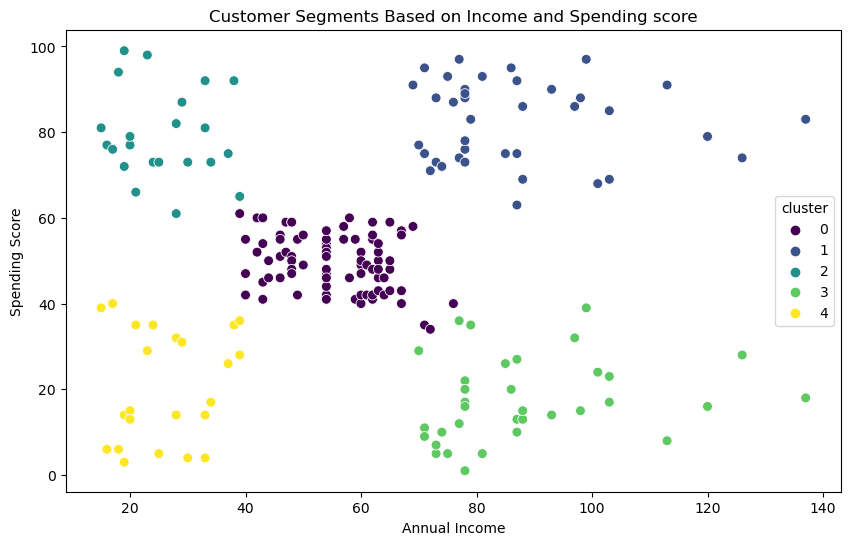

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['cluster'],palette='viridis',s=50)
plt.title('Customer Segments Based on Income and Spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [14]:
cluster_summary=df.groupby('cluster').mean()
print(cluster_summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043


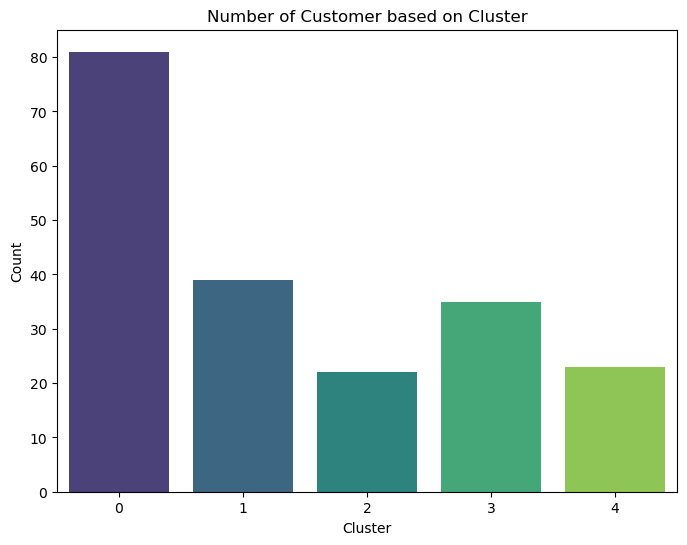

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['cluster'],palette='viridis')
plt.title('Number of Customer based on Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

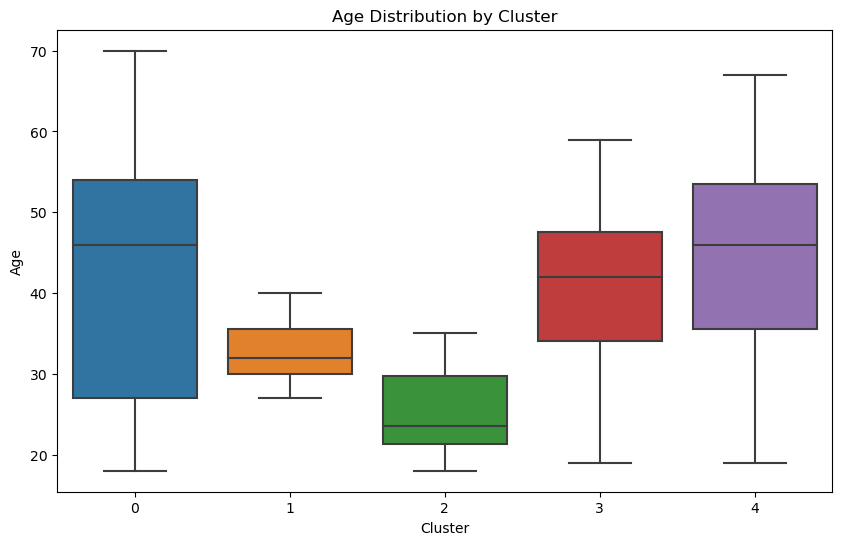

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['cluster'],y=df['Age'])
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

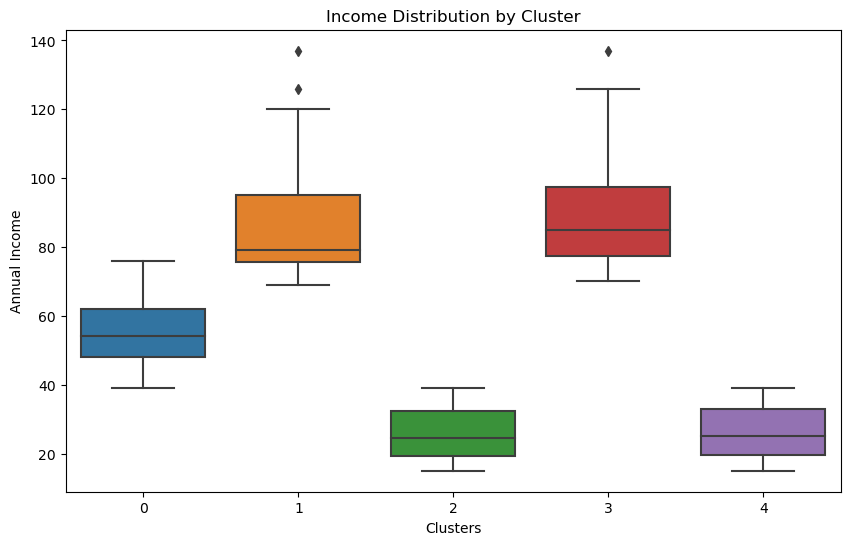

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['cluster'],y=df['Annual Income (k$)'])
plt.title('Income Distribution by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Annual Income')
plt.show()

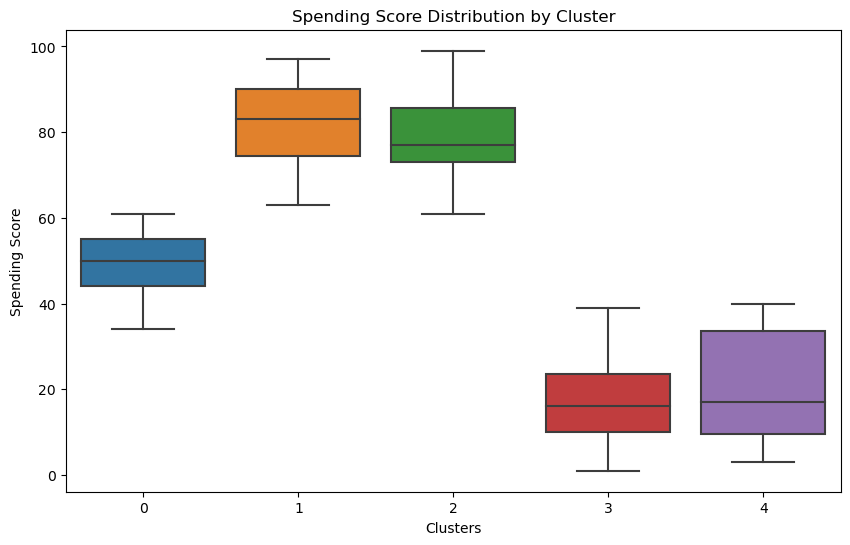

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['cluster'],y=df['Spending Score (1-100)'])
plt.title('Spending Score Distribution by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
# Describe clusters based on their characteristics
for cluster in sorted(df['cluster'].unique()):
    subset = df[df['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(f"  - Average Age: {subset['Age'].mean():.2f}")
    print(f"  - Average Income: {subset['Annual Income (k$)'].mean():.2f}k$")
    print(f"  - Average Spending Score: {subset['Spending Score (1-100)'].mean():.2f}")
    print(f"  - Gender Distribution: \n{subset['Gender'].value_counts(normalize=True) * 100}\n") 
         # normalize = True represent value in percentage

Cluster 0:
  - Average Age: 42.72
  - Average Income: 55.30k$
  - Average Spending Score: 49.52
  - Gender Distribution: 
Female    59.259259
Male      40.740741
Name: Gender, dtype: float64

Cluster 1:
  - Average Age: 32.69
  - Average Income: 86.54k$
  - Average Spending Score: 82.13
  - Gender Distribution: 
Female    53.846154
Male      46.153846
Name: Gender, dtype: float64

Cluster 2:
  - Average Age: 25.27
  - Average Income: 25.73k$
  - Average Spending Score: 79.36
  - Gender Distribution: 
Female    59.090909
Male      40.909091
Name: Gender, dtype: float64

Cluster 3:
  - Average Age: 41.11
  - Average Income: 88.20k$
  - Average Spending Score: 17.11
  - Gender Distribution: 
Male      54.285714
Female    45.714286
Name: Gender, dtype: float64

Cluster 4:
  - Average Age: 45.22
  - Average Income: 26.30k$
  - Average Spending Score: 20.91
  - Gender Distribution: 
Female    60.869565
Male      39.130435
Name: Gender, dtype: float64

